In [31]:
! pip install -q pandas astropy TPM2PPF_learntools matplotlib numpy

In [32]:
from TPM2PPF_learntools.core import binder; binder.bind(globals())
from TPM2PPF_learntools.TPM2.ex1 import *
print("Setup complete! You're ready to start question 1.")

%load_ext autoreload
%autoreload 2

Setup complete! You're ready to start question 1.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Poisson equation in 1D

Here, we propose to solve the Poisson equation over a 1D domain:

$$
\epsilon_0 \nabla_x  \left[ \epsilon_r(x) \nabla_x V(x) \right] = - \rho(x),  0<x<L_x
$$

## System description :

Is this section, we do not model any dielectric material.
Instead, we consider only the plasma between two metallic walls.

Hence, we consider the equation above with $\epsilon_r(x) = 1$, so the Poisson equation is simplified to :

$$  \Delta_x V(x) = - \frac{\rho(x)}{\epsilon_0} $$



# Section 1: Discretisation
We discretize the domain $x = [0, L_x]$ in $N$ cells of size $d_x$. The center of each cell is defined by the index $i$.

The unknown potential $\phi(x)$ becomes $V_i$ and the source term $ -\rho(x) / \epsilon_0$ becomes $d_i$.

## Q1. The volume
Find the coeficients $V_{e,i}$, $V_{w,i}$ and $V_{c,i}$ using the _finite volume_ discretisation in 1D:

$$
V_{e,i} V_{i+1} + V_{w,i} V_{i-1} - V_{c,i} V_{i} = d_i
$$

Do not take care of the boundary for now.

_____________
Type your answer here
______________

In [33]:
# q1.hint()  # Uncomment this line to have access to the hint

## Q2. The boundary conditions
The center of the cell $i=1$ correspond to $x=0$, and $i = N$ correspond to $x=L_x$.
Write the equation for $V_1$ and $V_N$ for the following cases:
1. Dirichlet condition: the anode in $i=1$ is at a voltage of $U_a$ and the cathode in $i=N$ at $U_c$
2. Neumann condition: no electric field at the anode nor the cathode
3. Periodic conditions


_____________
Type your answer here for the 3 cases
______________

In [34]:
# q2.hint()  # Uncomment this line to have access to the hint


## Q3. Linear system
Summarize the discretised Poisson equation by expressing the matrix $A$ and the vector $d$, such that $A\cdot V = d$ in the case of the Dirichlet condition, with $V$ the unkown vector $V=\{V_i\}_{1<i<N}$.

_____________
Type your answer here
______________

In [35]:
# q3.hint()  # Uncomment this line to have access to the hint

# Section 2: Resolution of the linear equation

In this section, we will code an algorithm to solve the discretized linear equation.

## Q4. Coding the Thomas Algorythm


Complete the function `thomas` below to solve the following tridiagonal system :

$$
   \begin{bmatrix}
    b_1&c_1&      &       &       &        \\
    a_2&b_2& c_{2}&       &       &        \\
       &a_3& b_{3}&c_{3}  &       &        \\
       &   &\ddots&\ddots &\ddots &        \\
       &   &      &a_{N-1}&b_{N-1}& c_{N-1}\\
       &   &      &       &a_N    & b_{N}
\end{bmatrix}\cdot\begin{bmatrix}
    V_1 \\ V_2 \\ V_3 \\ \dots \\ V_{N-1} \\ V_N    
\end{bmatrix}=\begin{bmatrix}
    d_1  \\ d_2  \\ d_3  \\ \dots \\ d_{N-1} \\ d_N      
\end{bmatrix}
$$

The Thomas algorithm can be found [on the Wikipedia page here](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm). 

There are two methode proposed on the page: one  using other vectors (noted $c'$ etc.), and another "in place" (the input vector are changed). 

Please use the 1st method.

In [36]:
import numpy as np

In [37]:
def thomas(a, b, c, d):
    """arguments: a,b,c and d, four vector of same size N
    Return V a vector of size N"""
    
    N = len(a)
    "Verifying that the inputs are correct"
    assert len(b)== N and len(c) == N and len(d) == N, "the arguments are not of the same lenght"
    
    V = np.zeros(N, dtype=np.float)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~
    # Write your code here
    #~~~~~~~~~~~~~~~~~~~~~~~~
    
    return V

In [38]:
# q4.hint()  # Uncomment this line to have access to the hint

In [39]:
# q4.check()  # run this line to find out if your answer is correct

## Q5. Solving the Poisson equation with Thomas' algorithm for 2 very simple source terms

Use the `thomas` function you have written to solve the poisson equation of question 2.1.3 for the different cases:
1. No charge density ($\rho = 0$ C/m³)
1. Uniform charge density ($\rho = 10^{-10}$ C/m³)

For each cases:
- define the vectors `a,b,c` and `d` accordingly
- use the `thomas` function to solve for `V`
- plot the results using `matplotlib.pyplot`
- analyse and discuss the results briefly (is the results acording to what you expect ?)


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('./presentation.mplstyle')  # improve the matplotlib figure with custom style

from astropy.constants import eps0
eps0 = eps0.value


### Q5.a No charge density

In this first step, we supose $\rho = 0$ but the electrodes are with a given potential.

In [41]:
Ua = 10  # Anode potential in V
Uc = 5   # Cathode potential in V
N = 50   # Number of points that discretize the domain
Lx = 1   # size of the domain in cm

In [42]:
""" No charge density: resolution"""

# Modify the following lines in order to solve for the problem stated
a = np.zeros(N)
b = np.ones(N)
c = np.ones(N)
d = np.ones(N)

V = thomas(a, b, c, d)



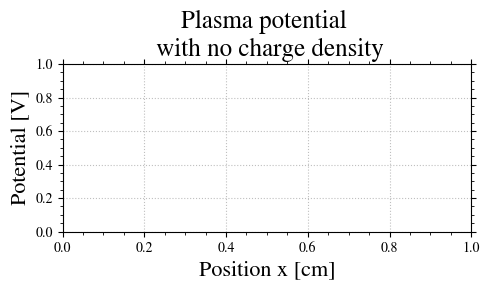

In [43]:
"""No charge density: results"""
plt.figure(figsize=(5,3))
plt.title("Plasma potential \n with no charge density")
plt.ylabel("Potential [V]")
plt.xlabel("Position x [cm]")
plt.tight_layout()

# Genergate the figure here by adding your solution to the figure

In [44]:
# q5.a.hint()  # Uncomment to get an hint

In [45]:
# q5.a.check()  # Uncomment to see if your answer is good.

_____________________________
Your comments here
______________________

In [46]:
# q5.a.check()  # Uncomment to find if your answer is good

### Q5.b Uniform charge density

Now, let's add a uniforme charge density between the two previous electrodes

In [47]:
rho = 5e-10 * np.ones(N)  # charge density in C/m³

In [48]:
""" Uniform charge density: resolution"""
# write your code here to take intoo account the charge density

' Uniform charge density: resolution'

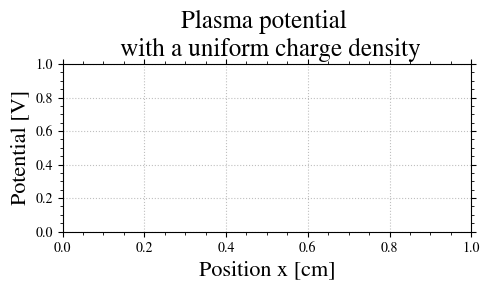

In [49]:
"""No charge density: results"""
plt.figure(figsize=(5,3))
plt.title("Plasma potential \n with a uniform charge density")
plt.ylabel("Potential [V]")
plt.xlabel("Position x [cm]")
plt.tight_layout()
# Genergate the figure here

_____________________________
Your comments here
______________________

In [50]:
# q5.b.check()  # Uncomment to find if your answer is good

# Section 3: Validation : Use of a manufactured solution :
*a method to test the solver for a more complex source term*

In order to validate the solver, the usual approach is to use a _manufactured solution_ :

1. first, an analytical potential is chosen (which matches the boundary conditions).
2. With this chosen potential, the analytical calculation of the left hand side of Poisson's equation is carried out to derive the analytical expression of the source term.
3. To check the solver, the analytical source term is implemented and we check if the calculated potential is equal to the initial analytical potentiel chosen initially. 

This is an efficient way to check the solver for conditions closer to those encountered during the plasma simulations.

## Q6. Manufactured solution
In this excercice, we propose to test `thomas` using this method:

1. Choose an arbitrary analytical solution $\phi_{theo}(x)$ (using a trigonometric function, polynoms or anything else)
2. Find $\rho_{theo}(x) = - \epsilon_0 \Delta_x \phi_{theo}(x)$ 
3. Solve $\phi_{num}$ using the `thomas` function, and compare it to $\phi_{theo}$


In [51]:
def phi_theo(x):
    """your defined solution"""
    # your code here
    phi = np.ones( len(x))
    return phi
    
def rho_theo(x):
    """your defined source term, `x` is a numpy array"""
    # your code here
    rho = np.zeros( len(x))
    return rho

In [52]:
"""Solving phi for rho_theo"""
# your code here

'Solving phi for rho_theo'

_____________________________
Your comments here
______________________

In [53]:
# q6.hint()


In [54]:
# q6.check() ## uncomment to fin if your solution works

# Section BONUS : Calculation of the electric field

**optional question : please proced to TP2 and TP3 if you don't have time for these questions**

For plasma simulations, the key quantity for the transport of charged particles and electron-impact reaction rate coefficients is the electric field.
Therefore, it is important to derive the electric field from the potential.

We need to calculate the electric field at different locations : at the interface between the cells (for transport terms) **and** at the center of the cells (for source terms).

In this section, you have to derive the electric field at both locations for the test-case of the previous section ( with the manufactured solution). Compare your results on the electric field with the one you can derive directly analytically.

In [55]:
"""Electric field at the interfaces between the cells"""
# Your code here


'Electric field at the interfaces between the cells'

In [56]:
"""Electric field at the center of the cells"""
# Your code here


'Electric field at the center of the cells'